 <span style="font-family: Arial; font-size:5em;color:red" > Projet python </span>

In [5]:
# Objectif: créer un algorithme de notation du crédit qui prédit la probabilité qu'un demandeur de prêt donné ne parvienne pas à rembourser son prêt.

<h1 align="center"> 1/import data and libraries </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import seaborn as sns
import os
#########################################
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.cluster import adjusted_rand_score
######################################################

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import DBSCAN


In [2]:
data = pd.read_csv("Bank_of_America_data.csv")
data.shape

(5960, 13)

In [3]:
#Contenu
#L'ensemble de données "Bank_of_America_data" contient des informations de référence et sur le rendement des prêts pour 5 960 prêts immobiliers récents.
#La cible (BAD) est une variable binaire indiquant si un demandeur a finalement fait défaut ou était gravement délinquant.
#Ce résultat indésirable s'est produit dans 1 189 cas (20%). Pour chaque demandeur, 12 variables d'entrée ont été enregistrées

In [4]:
data.head(4)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.isnull().sum()/len(data)

BAD        0.000000
LOAN       0.000000
MORTDUE    0.086913
VALUE      0.018792
REASON     0.042282
JOB        0.046812
YOJ        0.086409
DEROG      0.118792
DELINQ     0.097315
CLAGE      0.051678
NINQ       0.085570
CLNO       0.037248
DEBTINC    0.212584
dtype: float64

# Data Description


# BAD : 1(-) = client defaulted on loan 0 = loan repaid(+)
LOAN : Amount of the loan request
MORTDUE : Amount due on existing mortgage(montant du sur lhypothéque existance)
VALUE : Value of current property
REASON : DebtCon = debt consolidation(consolidation dette) HomeImp = home improvement
JOB : Six occupational categories
YOJ : Years at present job
DEROG : Number of major derogatory reports
DELINQ : Number of delinquent credit lines
CLAGE : Age of oldest trade line in months
NINQ : Number of recent credit lines
CLNO : Number of credit lines
DEBTINC : Debt-to-income ratio

In [6]:
data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [7]:
# Statistiques descriptives
# Distribution des données
# Il n'y a pas d'anomalie dans les données (respectez les maximums et moyennes dans chaque cas)

In [8]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


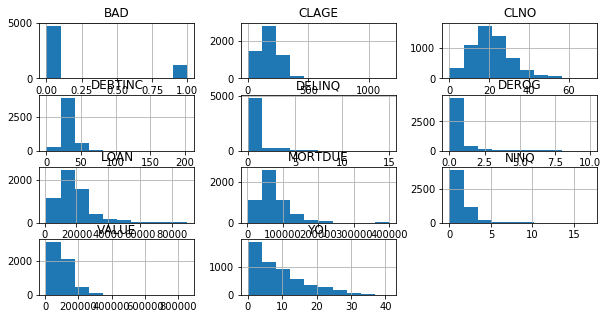

In [9]:
data.hist(figsize=(10,5));

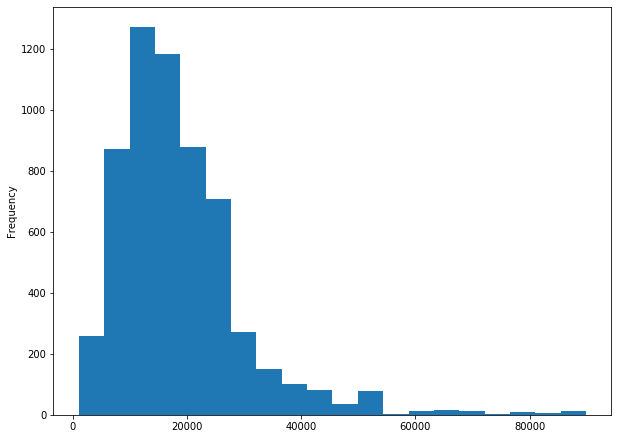

In [10]:
data["LOAN"].plot.hist(bins = 20,figsize=(10,7.5))
# distribution de variable "loan"
# la densité entre 10000-30000 est élevée

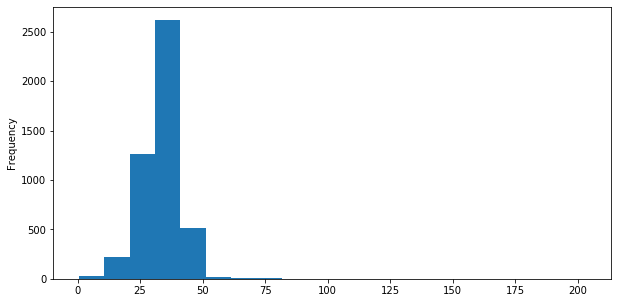

In [11]:
data["DEBTINC"].plot.hist(bins = 20,figsize=(10,5))
 


In [12]:
# Très peuplé autour de 25-50

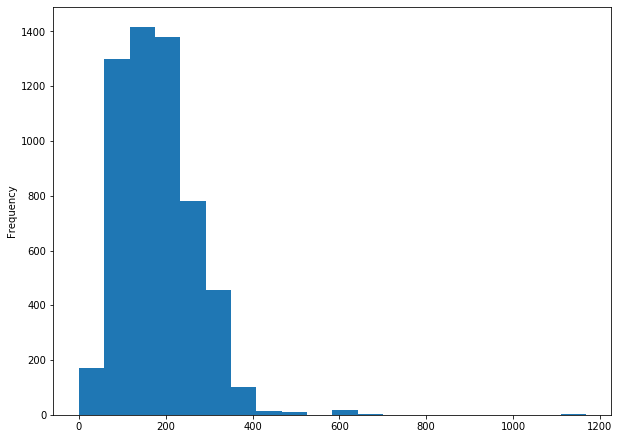

In [13]:
data["CLAGE"].plot.hist(bins = 20,figsize=(10,7.5))



In [14]:
# La densité est élevée autour de 100-300 

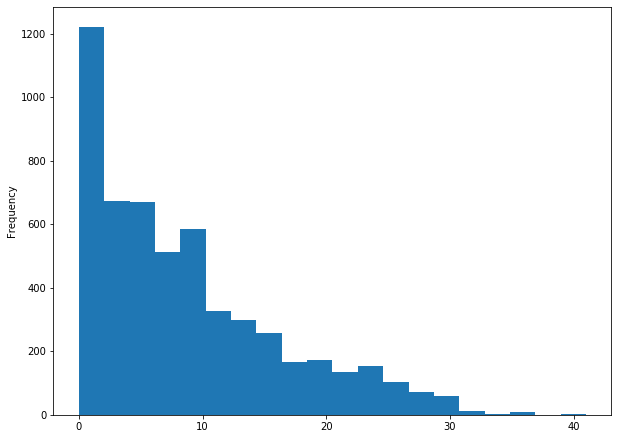

In [15]:
data["YOJ"].plot.hist(bins = 20,figsize=(10,7.5))

# conclusion
Les distributions sont correctes et il n'y a aucune anomalie dans les données.
DEBTINC a un nombre très élevé de données manquantes (sera traité dans la section suivante ).
La fonction YOJ est fortement asymétrique et peut être modifiée pour diminuer l'asymétrie.

#VALUE, MORTDUE, CLAGE, DEBTINC peuvent être plafonnés à la fin, c'est-à-dire que les valeurs très élevées seront définies sur une valeur inférieure sélectionnée.

In [16]:
data_types=data.dtypes #to print data types for each variable
data_types

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [17]:
data.describe(include=['object'])

,REASON,JOB
count,5708,5681
unique,2,6
top,DebtCon,Other
freq,3928,2388


## var raison et job

In [18]:
data["REASON"].unique()

array(['HomeImp', nan, 'DebtCon'], dtype=object)

In [19]:
data["JOB"].unique()

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

### #visualizing the categorical variable REASON


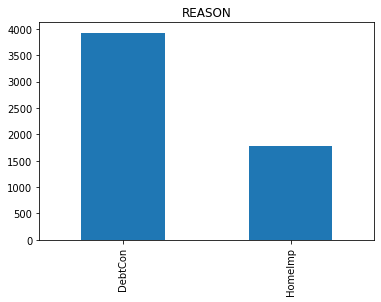

In [20]:

REASON_count= data["REASON"].value_counts().rename_axis('REASON').reset_index(name='Total Count')
data["REASON"].value_counts().plot.bar(title='REASON')

In [21]:

res=pd.crosstab(data['REASON'],data['BAD'])
res

BAD,0,1
REASON,,
DebtCon,3183,745
HomeImp,1384,396


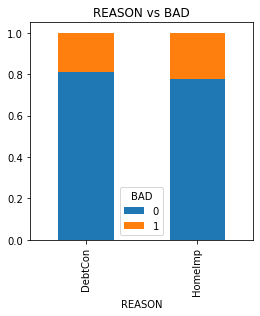

In [22]:
res.div(res.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='REASON vs BAD', figsize=(4,4));

### visualizing the categorical variable JOB


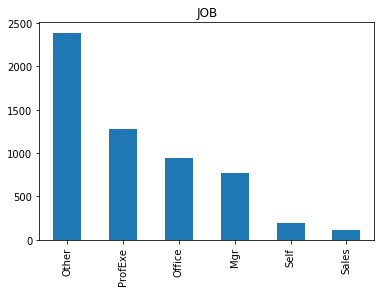

In [23]:
REASON_count= data["JOB"].value_counts().rename_axis('JOB').reset_index(name='Total Count')
data["JOB"].value_counts().plot.bar(title='JOB')

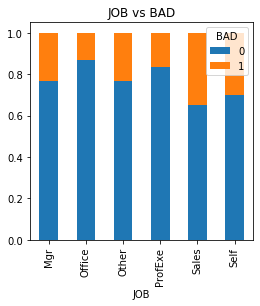

In [24]:
JOB=pd.crosstab(data['JOB'],data['BAD'])
JOB.div(JOB.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, title='JOB vs BAD', figsize=(4,4));

#en fonction de l'occupation
La fraction des prêts PAYÉS et PAR DÉFAUT montre une certaine dépendance à l'égard de l'occupation de l'entrepreneur.
Les employés de bureau et les cadres professionnels ont la plus forte probabilité de payer leurs prêts,
tandis que les vendeurs et les travailleurs(sales and self employed) indépendants ont la plus forte probabilité de défaut.
==>L'occupation présente un bon pouvoir discriminant et ce sera très probablement une caractéristique importante de notre modèle de classification.

<h1 align="center"> Feature engineering. </h1>

### 1) remplacer les valeurs nulls par moyenne pour les vars quanti et most frequent pour var quali

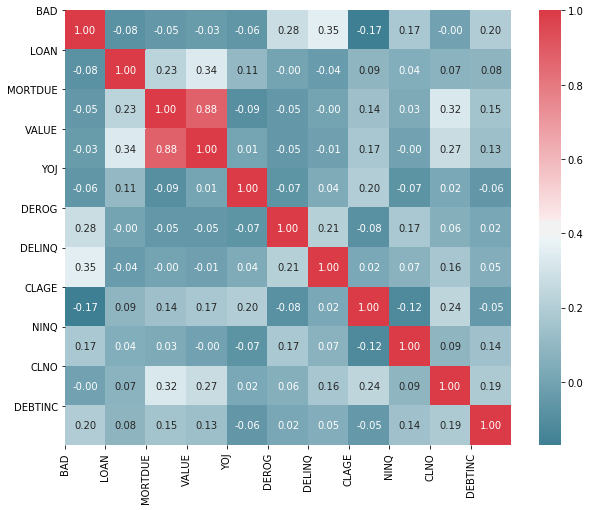

In [25]:
#Create Correlation matrix
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,8))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

# daprés mapColor (value et mortudue)  sont corrélés positivement

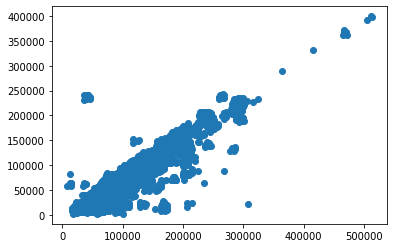

In [26]:
plt.scatter(data.VALUE,data.MORTDUE)

## Aussi d'aprés le nuage de point les variables MORTDUE et VALUE sont corrélés linéairement et positivement

In [27]:
# solution

In [28]:
moy=np.mean(data['MORTDUE']/data['VALUE'])

In [29]:
data.loc[(data.VALUE.isna())&(data.MORTDUE.notnull()),'VALUE']=data.MORTDUE/moy
data.loc[(data.MORTDUE.isna())&(data.VALUE.notnull()),'MORTDUE']=data.VALUE*moy

### Nous avons remplacé les valeurs manquantes de MORTDUE et VALUE en utilisant le principe du règle de trois vu la corrélation linéaire de ces deux variables
### REMARQUE : Il est possible de supprimer une parmi ces deux variables puisqu'elles nous donnenet la meme information

In [30]:
data.isna().sum()

BAD           0
LOAN          0
MORTDUE      27
VALUE        27
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

## Pour les champs nuls des 2 variables d'une meme ligne, la règle n'est pas appliquable, On va remplacer le reste par la moyenne

In [31]:
data['MORTDUE'].fillna(data['MORTDUE'].mean(), inplace = True)
data['VALUE'].fillna(data['VALUE'].mean(), inplace = True)


In [32]:
data.isna().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

## Remplissage des champs vides pour DEBTINC

In [33]:
test=data[['LOAN','JOB','DEBTINC']]
test2=test.dropna(subset=['DEBTINC'])
a=test2.groupby(['LOAN','JOB']).agg(lambda x:x.value_counts().index[0])

In [34]:
a

DEBTINC
LOAN  JOB                
1700  Other     37.113614
1800  Other     36.884894
2300  Office    31.588503
2400  Mgr       38.263601
      Office    29.681827
2900  Mgr       49.206396
      Office    29.915859
      Other     36.211348
3000  Office    32.059783
3200  Mgr       40.115677
      Other     35.553539
      ProfExe   42.909997
3300  Other     35.730559
3600  Mgr       41.516390
      Office    20.470916
3700  Other     26.634348
3800  Office    20.067042
      Self      42.173166
3900  Office    29.343921
      Other     24.478881
4000  Mgr       39.166329
      Office    21.806563
4100  Other     33.840920
      ProfExe   22.278174
4200  Office    20.208033
      Other     43.450588
4300  Other     36.432094
      Sales     34.181377
4400  Office    39.158085
      ProfExe   23.581079
...                   ...
64900 Office    43.519943
65100 Office    43.368718
65200 Office    43.191163
65500 ProfExe  144.189001
65800 Office    39.918790
66000 Office    41.612506
66400 Office    39.975347
66500 Office    39.821440
67400 Office    42.045672
68100 Self      30.395869
68700 Self      29.423058
69000 Self      30.356857
69600 Self      27.761644
69700 Self      28.201871
70300 Self      28.907073
70500 Self      29.582301
70800 Self      30.378548
71200 Self      29.220351
75400 Other     41.105569
77400 Self      40.929793
87000 Other     36.088037
87500 Other     36.753653
88300 Other     36.262691
88500 Other     34.751158
88800 Other     34.242465
88900 Other     36.112347
89000 Other     35.859971
89200 Other     35.556590
89800 Other     34.340882
89900 Other     34.571519

[1418 rows x 1 columns]

In [35]:
data2=data.copy()

In [36]:
data2=data2.merge(a,on=['LOAN','JOB'],how='left')

In [37]:
data2.loc[(data2.DEBTINC_x.isna())&(data2.DEBTINC_y.notnull()),'DEBTINC_x']=data2.DEBTINC_y

## On a utilisé la méthode groupby pour remplacer les champs vides de DEBTINC puisque DEBTINC est le ratio d'endettement, et cette information est retenue à partir du JOB et LOAN

In [38]:
data2.isna().sum()

BAD            0
LOAN           0
MORTDUE        0
VALUE          0
REASON       252
JOB          279
YOJ          515
DEROG        708
DELINQ       580
CLAGE        308
NINQ         510
CLNO         222
DEBTINC_x    289
DEBTINC_y    523
dtype: int64

In [39]:
data2['MISSINGV']=data2.isnull().sum(axis=1)

In [40]:
data2.shape

(5960, 15)

In [41]:
data_miss=data2.loc[data2.MISSINGV<=5]

In [42]:
data_miss.shape

(5807, 15)

In [43]:
data_miss.isna().sum()

BAD            0
LOAN           0
MORTDUE        0
VALUE          0
REASON       167
JOB          147
YOJ          398
DEROG        555
DELINQ       427
CLAGE        155
NINQ         357
CLNO          69
DEBTINC_x    264
DEBTINC_y    386
MISSINGV       0
dtype: int64

## Nous avonc supprimé les lignes ayant 5 valeurs manquantes

In [44]:

data3=data_miss.copy()

#YOJ
YOJ=data3['YOJ'].mean()
data3['YOJ'].fillna(YOJ,inplace=True)

#DEROG
DEROG=data3['DEROG'].mean()
data3['DEROG'].fillna(DEROG,inplace=True)

#CLAGE
CLAGE=data3['CLAGE'].mean()
data3['CLAGE'].fillna(CLAGE,inplace=True)
#NINQ
NINQ=data3['NINQ'].mean()
data3['NINQ'].fillna(NINQ,inplace=True)
#CLNO
CLNO=data3['CLNO'].mean()
data3['CLNO'].fillna(CLNO,inplace=True)


dela=data3['DELINQ'].mean()
data3['DELINQ'].fillna(dela,inplace=True)



### Nous avons remplacé les  Variables quantitatives nulles  par la moyenne avec la méthode (fillna())

In [45]:
data3.drop(columns=['MISSINGV','DEBTINC_y'],axis=1,inplace=True)


In [46]:
dat=list(data3.columns)
dat[12] = 'DEBTINC'
data3.columns = dat

In [47]:
data3.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614


In [48]:
data3.isna().sum()
# vérifier si tous les vars quanti sont modifiés



BAD          0
LOAN         0
MORTDUE      0
VALUE        0
REASON     167
JOB        147
YOJ          0
DEROG        0
DELINQ       0
CLAGE        0
NINQ         0
CLNO         0
DEBTINC    264
dtype: int64


## Remplacement les valeurs nulls en utilisant la classe majoritaire pour les variables quali
## la classe majoritaire en cas de variable JOB est "other"
## classe majoritaire en cas de RAISON varibale est "DebtCon"

In [49]:
data4= data3.drop(columns=['REASON','JOB'], axis=1)
xx = data3[['REASON','JOB']]
xxjdid=xx.apply(lambda i : i.fillna(i.value_counts().index[0]))
xxjdid.isna().sum()
data5=pd.concat([data4,xxjdid],axis=1)

In [50]:
type(data5)

pandas.core.frame.DataFrame

In [51]:
#DEBTINC
DEBTINC=data5['DEBTINC'].mean()
data5['DEBTINC'].fillna(DEBTINC,inplace=True)


In [52]:
dataSansNull=data5.copy()

In [53]:
dataSansNull.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
REASON     0
JOB        0
dtype: int64

In [54]:
dataSansNull.head(15)

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,1100,25860.000000,39025.0,10.500000,0.0,0.0,94.366667,1.0,9.0,33.925301,HomeImp,Other
1,1,1300,70053.000000,68400.0,7.000000,0.0,2.0,121.833333,0.0,14.0,33.925301,HomeImp,Other
2,1,1500,13500.000000,16700.0,4.000000,0.0,0.0,149.466667,1.0,10.0,33.925301,HomeImp,Other
4,0,1700,97800.000000,112000.0,3.000000,0.0,0.0,93.333333,0.0,14.0,33.925301,HomeImp,Office
5,1,1700,30548.000000,40320.0,9.000000,0.0,0.0,101.466002,1.0,8.0,37.113614,HomeImp,Other
6,1,1800,48649.000000,57037.0,5.000000,3.0,2.0,77.100000,1.0,17.0,36.884894,HomeImp,Other
7,1,1800,28502.000000,43034.0,11.000000,0.0,0.0,88.766030,0.0,8.0,36.884894,HomeImp,Other
8,1,2000,32700.000000,46740.0,3.000000,0.0,2.0,216.933333,1.0,12.0,33.925301,HomeImp,Other
9,1,2000,44103.725904,62250.0,16.000000,0.0,0.0,115.800000,0.0,13.0,33.925301,HomeImp,Sales
11,1,2000,20627.000000,29800.0,11.000000,0.0,1.0,122.533333,1.0,9.0,33.925301,HomeImp,Office


#### dataframe final  :  dataSansNull

In [55]:
#df=pd.get_dummies(dataSansNull, columns=['REASON','JOB'])
#df.head()


#   Encodage des colonnes qualitative


##  Encodage avec la méthode OneHotEncoder et get_dummies pour les variables REASON et JOB

In [56]:
df=pd.get_dummies(dataSansNull, columns=['REASON','JOB'])
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,33.925301,0,1,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,33.925301,0,1,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,33.925301,0,1,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,33.925301,0,1,0,1,0,0,0,0
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0


In [57]:
df.isna().sum()

BAD               0
LOAN              0
MORTDUE           0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_DebtCon    0
REASON_HomeImp    0
JOB_Mgr           0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
matrix1 = onehotencoder.fit_transform(dataSansNull["JOB"].values.reshape(-1,1)).toarray()
matrix = onehotencoder.fit_transform(dataSansNull["REASON"].values.reshape(-1,1)).toarray()


dff=pd.DataFrame(matrix1)

mat1=pd.DataFrame(matrix,columns=("DebtCon","HomeImp"))

mat2=pd.DataFrame(matrix1, columns=("MGR","Office","Other","ProfExe","Sales","Self"))


q=dataSansNull.drop(columns=["JOB","REASON"],axis=1)


#3concat
df=pd.concat([q,mat1,mat2],axis=1)

## diviser données en 2 dataframes 1 pour les données et l'autre pour le target variable

In [58]:
# Extract independent and target variables
X = df.drop(['BAD'], axis=1)
y = df['BAD']

<h1 align="center"> Apprentissage supervisé </h1>

# 1/Classification

In [59]:
#Avant d'appliquer les algorithmes, les données sont divisées en ensembles d'apprentissage et de test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Centrage et Rescaling 

####   rescaling avec standard scaler(valeur moyenn et ecart type)

In [60]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

#Scaling

# distribution de la variable cible "BAD"


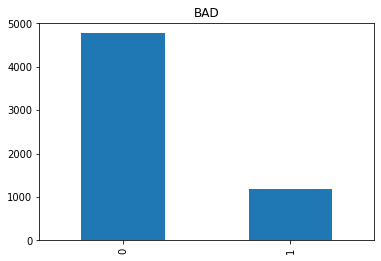

In [61]:
# Distribution de fréquence de la variable cible "BAD" et visualisation de la variable cible
data["BAD"].value_counts().plot.bar(title='BAD');


# La classe cible est un peu déséquilibrée - les zéros sont d'environ 80%(not defulters) et les uns d'environ 20%

In [62]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

 <span style="font-family: Arial; font-size:4.5em;color:red" >1)KNN </span>

Text(0, 0.5, 'Erreur')

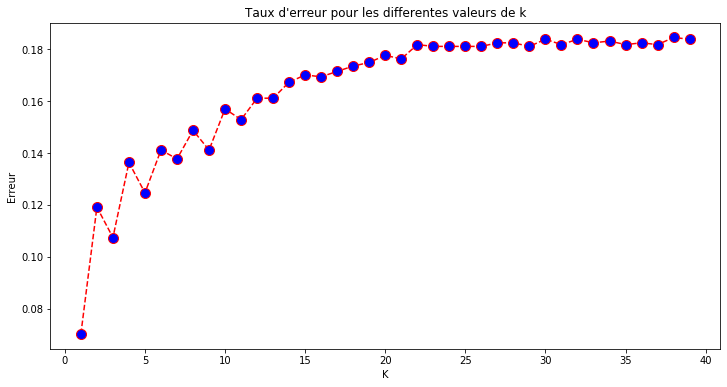

In [63]:
# Choisir le meilleur k
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux d\'erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

In [64]:
knn = KNeighborsClassifier(2)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [65]:
# Matrice de confusion

print(confusion_matrix(y_test, y_pred_knn))

[[1151    1]
 [ 172  128]]


Confusion matrix, without normalization
[[1151    1]
 [ 172  128]]


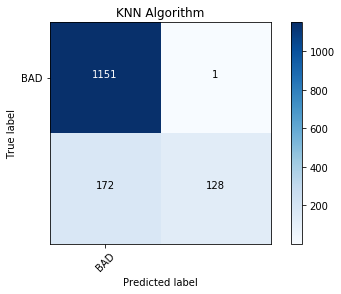

In [66]:
matrixKK = confusion_matrix(y_test, y_pred_knn)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(matrixKK, classes=["BAD"],
                      title='KNN Algorithm')
plt.show()

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1152
           1       0.99      0.43      0.60       300

    accuracy                           0.88      1452
   macro avg       0.93      0.71      0.76      1452
weighted avg       0.90      0.88      0.86      1452



In [68]:
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(knn_model.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(knn_model.score(X_test, y_test)))
#accuracy
acs=accuracy_score(y_test,y_pred_knn)
acs

Accuracy of Random Forest classifier on training set: 0.94
Accuracy of Random Forest classifier on test set: 0.88


0.8808539944903582

In [69]:
# EVALUER PAR courbe Roc

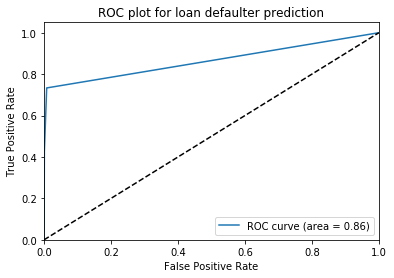

In [70]:
#ROC plot
y_scoreKNN= knn_model.predict_proba(X_test)
from sklearn.metrics import roc_curve, auc
def plot_roc(y_test, y_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_scoreKNN[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC plot for loan defaulter prediction")
    plt.legend(loc="lower right")
    plt.show()
#Plot ROC
plot_roc(y_test, y_scoreKNN)

#### algo KNN  taux 0.90 %

## KNN validation croiséé
### évaluer les perdormances à l'aide technique de ré_échantillonage

In [71]:
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
y_pred_cv = cross_val_predict(knn_cv, X, y, cv=3)
y_pred_cv

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [72]:
print(cv_scores)
print("score accuracy:{}".format(np.mean(cv_scores)))##taux de succés

[0.55 0.63 0.67 0.74 0.79]
score accuracy:0.6744021631661856


In [73]:
# Croos_val destinéé au cas faible effectif or ce n'est pas le cas


 <span style="font-family: Arial; font-size:4.5em;color:red" >2) méthode CART </span>
 

In [74]:
dtc = DecisionTreeClassifier()
dectree_basic =dtc.fit(X_train, y_train)
y_pre = dectree_basic.predict(X_test)

In [75]:
# Validating the algorithm using various Performance metrics

print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1152
           1       0.74      0.58      0.65       300

    accuracy                           0.87      1452
   macro avg       0.82      0.76      0.79      1452
weighted avg       0.86      0.87      0.86      1452



In [76]:
acs=accuracy_score(y_test,y_pre)
acs

0.8705234159779615

Confusion matrix, without normalization
[[1089   63]
 [ 125  175]]


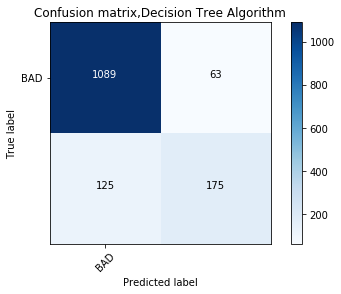

In [77]:
#from sklearn.metrics import confusion_matrixprint(confusion_matrix(y_test, y_pred_rfc))
# Computing Confusion matrix for the above algorithm

cnf_matrix = confusion_matrix(y_test, y_pre)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["BAD"],
                      title='Confusion matrix,Decision Tree Algorithm')


plt.show()

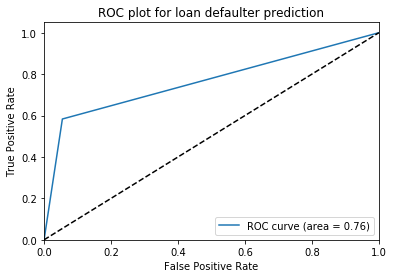

In [78]:
#ROC plot
y_score= dectree_basic.predict_proba(X_test)
from sklearn.metrics import roc_curve, auc
def plot_roc(y_test, y_score):
    fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC plot for loan defaulter prediction")
    plt.legend(loc="lower right")
    plt.show()
#Plot ROC
plot_roc(y_test, y_score)


 <span style="font-family: Arial; font-size:4.5em;color:red" >3)   LOgistic Regression </span>
 


In [79]:
logreg_basic = LogisticRegression()
# Training the basic logistic regression model with training set 
logreg_basic.fit(X_train, y_train)
y_pred = logreg_basic.predict(X_test)



In [80]:
# Validating the algorithm using various Performance metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1152
           1       0.67      0.30      0.42       300

    accuracy                           0.83      1452
   macro avg       0.76      0.63      0.66      1452
weighted avg       0.81      0.83      0.80      1452



Confusion matrix, without normalization
[[1107   45]
 [ 209   91]]


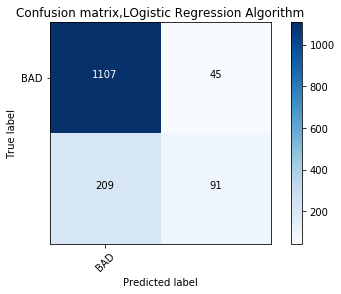

In [81]:
cnf_matrixL= confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrixL, classes=["BAD"],
                      title='Confusion matrix,LOgistic Regression Algorithm')
plt.show()


 <span style="font-family: Arial; font-size:4.5em;color:red" >4)  RandomForestClassifier </span>
 



In [82]:

rfc = RandomForestClassifier()
rfc_model = rfc.fit(X_train, y_train)
y_pred_rfc = rfc_model.predict(X_test)

In [83]:
print(classification_report(y_test, y_pred_rfc))
acs=accuracy_score(y_test,y_pred_rfc)
print("accuracy",acs)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1152
           1       0.97      0.53      0.69       300

    accuracy                           0.90      1452
   macro avg       0.93      0.76      0.81      1452
weighted avg       0.91      0.90      0.89      1452

accuracy 0.8994490358126722


In [84]:
# accuracy 0.89

Confusion matrix, without normalization
[[1147    5]
 [ 141  159]]


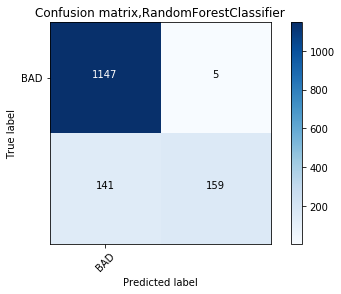

In [85]:
cnf_matrixL= confusion_matrix(y_test, y_pred_rfc)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrixL, classes=["BAD"],
                      title='Confusion matrix,RandomForestClassifier')
plt.show()


 <span style="font-family: Arial; font-size:4.5em;color:red" >5)  naive_bayes (GaussianNB) </span>
 


In [86]:
gg=GaussianNB()
rfc_modelgg = gg.fit(X_train, y_train)
y_pred_rfcgg= rfc_modelgg.predict(X_test)

In [87]:
print(classification_report(y_test, y_pred_rfcgg))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1152
           1       0.48      0.40      0.44       300

    accuracy                           0.79      1452
   macro avg       0.67      0.64      0.65      1452
weighted avg       0.77      0.79      0.78      1452



In [88]:
acs=accuracy_score(y_test,y_pred_rfcgg)
acs

0.7865013774104683

Confusion matrix, without normalization
[[1022  130]
 [ 180  120]]


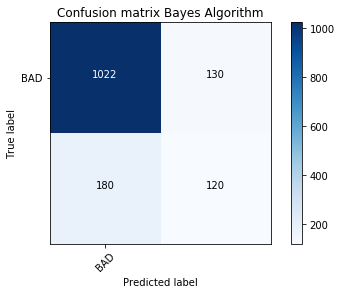

In [89]:
cnf_matrixL= confusion_matrix(y_test, y_pred_rfcgg)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrixL, classes=["BAD"],
                      title='Confusion matrix Bayes Algorithm')
plt.show()


 <span style="font-family: Arial; font-size:4.5em;color:red" >6)  Supporting Vector Classifier </span>
 


In [90]:
from sklearn.svm import SVC

SVC = SVC(gamma='auto')
rfc_model1 = SVC.fit(X_train, y_train)
y_pred_rfc1 = rfc_model1.predict(X_test)

In [91]:
print(classification_report(y_test, y_pred_rfc1))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1152
           1       0.91      0.40      0.56       300

    accuracy                           0.87      1452
   macro avg       0.89      0.69      0.74      1452
weighted avg       0.87      0.87      0.85      1452



In [92]:
acs=accuracy_score(y_test,y_pred_rfc1)

Confusion matrix, without normalization
[[1140   12]
 [ 180  120]]


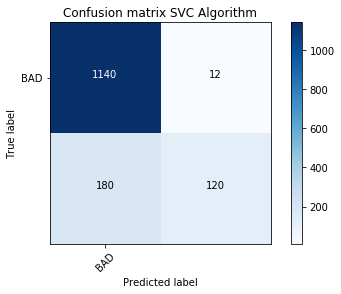

In [93]:
cnf_matrixL= confusion_matrix(y_test, y_pred_rfc1)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrixL, classes=["BAD"],
                      title='Confusion matrix SVC Algorithm')
plt.show()

### chercher best Model (GridSearchCV)

In [100]:

from sklearn.svm import SVC

model = SVC(probability=True)
#parameters for grid search for SVM are kernel,degree,gamma and C
from sklearn.model_selection import GridSearchCV
param_dict = {'kernel':['rbf','poly'],'degree': [1,2,3], 'C':[0.5,0.75,1],'gamma': [0.01, 0.1, 1]}
#parameters for grid search for SVM are kernel,degree,gamma and C


In [101]:

#best_model = GridSearchCV(model, param_dict, cv=5, scoring= 'precision') 
best_model = GridSearchCV(model, param_dict, cv=5) 


In [102]:
best_model.fit(X_train, y_train)
best_model.best_params_ 

KeyboardInterrupt: 

In [ ]:
best_model.best_params_ 


 <span style="font-family: Arial; font-size:4.5em;color:red" >7)  XGBOOST </span>


In [103]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

In [104]:
dataSansNull.BAD.value_counts()

0    4636
1    1171
Name: BAD, dtype: int64

seed = 7
test_size = 0.2
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.drop(columns=['BAD'],axis=1), df.BAD, test_size=test_size, random_state=seed)

In [105]:
 model = XGBClassifier(n_estimators=100, max_depth=15, learning_rate=0.1, subsample=0.5,verbosity=1,silent=1,scale_pos_weight=10)

train_model = model.fit(X_train, y_train)

In [106]:
pred = train_model.predict(X_test)
print(classification_report(y_test, pred))
acs=accuracy_score(y_test,pred)
print("accuracy",acs)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1152
           1       0.88      0.72      0.79       300

    accuracy                           0.92      1452
   macro avg       0.91      0.85      0.87      1452
weighted avg       0.92      0.92      0.92      1452

accuracy 0.9221763085399449


Confusion matrix, without normalization
[[1124   28]
 [  85  215]]


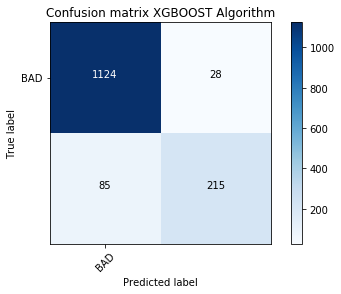

In [107]:
cnf_matrixL= confusion_matrix(y_test, pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrixL, classes=["BAD"],
                      title='Confusion matrix XGBOOST Algorithm')
plt.show()

## Courbe ROC

In [108]:
from sklearn.metrics import roc_curve, auc
#*****************Algo CART*******************
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pre)
roc_auc1 = auc(fpr1, tpr1)
#*****************Algo random forest*******************
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_rfc)
roc_auc2 = auc(fpr2, tpr2)
#*****************Algo KNN*******************
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_knn)
roc_auc3 = auc(fpr3, tpr3)
#*****************Algo XGB*******************
fpr4, tpr4, threshold4 = roc_curve(y_test, pred)
roc_auc4 = auc(fpr4, tpr4)

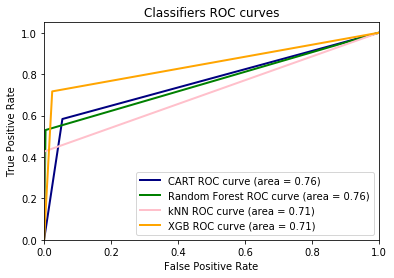

In [109]:
plt.figure() 
plt.plot(fpr1, tpr1, color='navy', lw=2, label='CART ROC curve (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='pink', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='orange', lw=2, label='XGB ROC curve (area = %0.2f)'% roc_auc3)
#plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

## D'après la courbe ROC on remarque que la courbe de XGBOOST est la meilleur alors on va travailler avec XGBOOST

 <span style="font-family: Arial; font-size:3em;color:red" >Feature Selection / Dimension Reduction</span>


# ACP

In [110]:
# Calcul des composantes principales
# Le nombre de composantes (K) n’étant pas spécifié, il est par défaut égal au nombre de variables (K = p)
pca = PCA()
coord = pca.fit_transform(X)
coord

array([[-7.89e+04,  5.45e+03, -1.31e+04, ...,  1.33e-03, -1.21e-15,
        -1.20e-17],
       [-2.86e+04,  2.25e+04, -1.13e+04, ...,  3.58e-03, -3.07e-16,
        -1.53e-17],
       [-1.04e+05,  8.87e+03, -1.06e+04, ..., -4.58e-03, -5.03e-16,
         5.52e-17],
       ...,
       [-1.49e+04, -2.44e+04,  6.74e+04, ...,  8.00e-02,  3.09e-17,
        -2.02e-17],
       [-1.80e+04, -2.68e+04,  6.77e+04, ...,  8.14e-02,  9.46e-17,
        -1.78e-17],
       [-2.12e+04, -2.63e+04,  6.80e+04, ...,  8.09e-02,  5.56e-17,
        -1.86e-17]])

In [111]:
pca.n_components_

18

In [112]:
X.shape

(5807, 18)

In [113]:
pca.explained_variance_

array([5.25e+09, 2.79e+08, 1.07e+08, 6.93e+03, 8.90e+01, 6.00e+01,
       4.99e+01, 2.72e+00, 1.17e+00, 5.83e-01, 3.95e-01, 2.88e-01,
       1.80e-01, 1.38e-01, 3.86e-02, 2.07e-02, 1.19e-31, 3.89e-33])

In [114]:
pca.explained_variance_ratio_.sum()

1.0

In [115]:
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
eigval = (n-1)/n*pca.explained_variance_
eigval

array([5.25e+09, 2.78e+08, 1.07e+08, 6.93e+03, 8.90e+01, 6.00e+01,
       4.99e+01, 2.72e+00, 1.17e+00, 5.83e-01, 3.95e-01, 2.88e-01,
       1.80e-01, 1.38e-01, 3.86e-02, 2.07e-02, 1.19e-31, 3.89e-33])

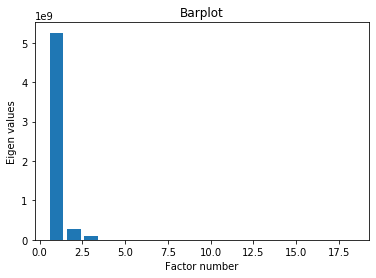

In [116]:
# barplot des valeurs propres
plt.bar(np.arange(1,p+1),eigval);
plt.title("Barplot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

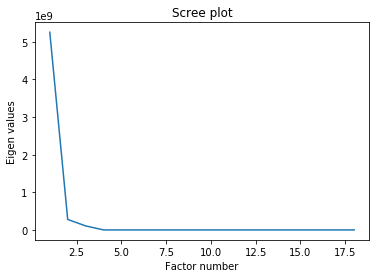

In [117]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

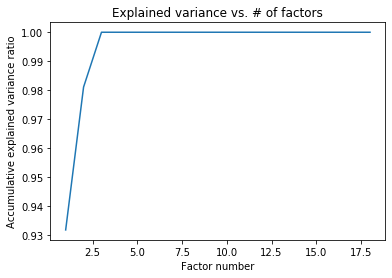

array([0.93, 0.98, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ])

In [118]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Accumulative explained variance ratio")
plt.xlabel("Factor number")
plt.show()
np.cumsum(pca.explained_variance_ratio_)

- D'après le critère de coude, on préserve 9 composantes principales (axes) au lieu de 18 
- Ensemble, il explique 73% de l'information

In [119]:
#contribution des individus dans l'inertie totale
di = np.sum(X**2,axis=1)
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p-1):
    cos2[:,j] = cos2[:,j]/di
#contributions aux axes
ctr = coord**2
for j in range(p-1):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])

pd.DataFrame({'Inertie':di,'COS2_D1':cos2[:,0],'COS2_D2':cos2[:,1], 'COS2_D3':cos2[:,2], 'COS2_D4':cos2[:,3],
              'Contrib_D1':ctr[:,0],'Contrib_D2':ctr[:,1],'Contrib_D3':ctr[:,2],'Contrib_D4':ctr[:,3]})

,Inertie,COS2_D1,COS2_D2,COS2_D3,COS2_D4,Contrib_D1,Contrib_D2,Contrib_D3,Contrib_D4
0,2.192910e+09,2.835615,0.013533,0.077858,2.067921e-06,0.000204,0.000018,0.000275,1.126335e-04
1,9.587689e+09,0.085462,0.052645,0.013296,1.804304e-07,0.000027,0.000312,0.000205,4.296712e-05
2,4.634136e+08,23.353280,0.169830,0.244383,8.638302e-08,0.000355,0.000049,0.000182,9.942822e-07
4,2.211174e+10,0.023510,0.015167,0.009283,2.990826e-07,0.000017,0.000207,0.000331,1.642580e-04
5,2.561785e+09,2.192165,0.026188,0.056168,1.400027e-06,0.000184,0.000041,0.000232,8.908233e-05
6,5.623192e+09,0.456448,0.027367,0.025922,1.336174e-06,0.000084,0.000095,0.000235,1.866202e-04
7,2.667539e+09,2.055099,0.009315,0.060339,2.058759e-06,0.000180,0.000015,0.000259,1.364045e-04
8,3.257966e+09,1.441817,0.011133,0.047982,8.757835e-07,0.000154,0.000022,0.000252,7.086891e-05
9,5.824216e+09,0.417533,0.005712,0.031234,4.472385e-07,0.000080,0.000021,0.000293,6.469774e-05
11,1.317530e+09,6.052689,0.033035,0.098108,1.031500e-06,0.000261,0.000027,0.000208,3.375529e-05


In [120]:
#positionnement des individus dans le premier plan
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(i,(coord[i,0],coord[i,1]),color='blue')
#ajouter les axes
plt.plot([-5,5],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='black',linestyle='-',linewidth=1)
#affichage
plt.xlabel("Dim 1 (%0.2f %%)"% (pca.explained_variance_ratio_[0]*100))
plt.ylabel("Dim 2 (%0.2f %%)"% (pca.explained_variance_ratio_[1]*100))
axes.set_xlim([-5,5]) #même limites en abscisse
axes.set_ylim([-5,5]) #et en ordonnée
plt.show()

ValueError: Image size of 44961279x9445251 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

In [121]:
#positionnement des individus dans le deuxième plan
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(i,(coord[i,2],coord[i,3]),color='blue')
#ajouter les axes
plt.plot([-5,5],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-5,5],color='black',linestyle='-',linewidth=1)
#affichage
plt.xlabel("Dim 3 (%0.2f %%)"% (pca.explained_variance_ratio_[2]*100))
plt.ylabel("Dim 4 (%0.2f %%)"% (pca.explained_variance_ratio_[3]*100))
axes.set_xlim([-5,5]) #même limites en abscisse
axes.set_ylim([-5,5]) #et en ordonnée
plt.show()

ValueError: Image size of 4788904x34662 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

### Analyse des variables

In [122]:
# Matrice de Corrélation
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
#cosinus carré des variables (qualité de représentation)
cos2var = corvar**2
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]

    
pd.DataFrame({'id':X.columns,'COR_D1':corvar[:,0],'COR_D2':corvar[:,1], 'COR_D3':corvar[:,2], 'COR_D4':corvar[:,3],
              'COS2_D1':cos2var[:,0],'COS2_D2':cos2var[:,1], 'COS2_D3':cos2var[:,2], 'COS2_D4':cos2var[:,3],
              'Contrib_D1':ctrvar[:,0],'Contrib_D2':ctrvar[:,1],'Contrib_D3':ctrvar[:,2], 'Contrib_D4':ctrvar[:,3]})

,id,COR_D1,COR_D2,COR_D3,COR_D4,COS2_D1,COS2_D2,COS2_D3,COS2_D4,Contrib_D1,Contrib_D2,Contrib_D3,Contrib_D4
0,LOAN,3391.929286,-3802.045105,10054.269198,-0.016538,2.189810e-03,5.191372e-02,9.458964e-01,3.944976e-08,2.189810e-03,5.191372e-02,9.458964e-01,3.944976e-08
1,MORTDUE,44308.928558,12958.578443,1576.683393,0.018749,3.736762e-01,6.030626e-01,2.326117e-02,5.070084e-08,3.736762e-01,6.030626e-01,2.326117e-02,5.070084e-08
2,VALUE,57264.101449,-9801.679379,-1815.527237,-0.033126,6.241340e-01,3.450235e-01,3.084240e-02,1.582719e-07,6.241340e-01,3.450235e-01,3.084240e-02,1.582719e-07
3,YOJ,-0.170813,-1.189560,0.440538,1.348833,5.553329e-12,5.081832e-09,1.815971e-09,2.624102e-04,5.553329e-12,5.081832e-09,1.815971e-09,2.624102e-04
4,DEROG,-0.044161,-0.002018,0.012994,-0.056454,3.711770e-13,1.462433e-14,1.579907e-12,4.596796e-07,3.711770e-13,1.462433e-14,1.579907e-12,4.596796e-07
5,DELINQ,-0.003815,0.018581,-0.033191,0.027275,2.770581e-15,1.239855e-12,1.030841e-11,1.072960e-07,2.770581e-15,1.239855e-12,1.030841e-11,1.072960e-07
6,CLAGE,13.417524,-7.593175,0.906107,83.228532,3.426555e-08,2.070591e-07,7.682486e-09,9.990996e-01,3.426555e-08,2.070591e-07,7.682486e-09,9.990996e-01
7,NINQ,0.011001,0.107705,0.118628,-0.180526,2.303455e-14,4.165977e-11,1.316783e-10,4.700518e-06,2.303455e-14,4.165977e-11,1.316783e-10,4.700518e-06
8,CLNO,3.039623,1.629943,0.408018,2.052940,1.758541e-09,9.540974e-09,1.557762e-09,6.078784e-04,1.758541e-09,9.540974e-09,1.557762e-09,6.078784e-04
9,DEBTINC,1.094333,0.688583,0.583740,-0.409972,2.279354e-10,1.702787e-09,3.188462e-09,2.424221e-05,2.279354e-10,1.702787e-09,3.188462e-09,2.424221e-05


In [123]:
#corrélation de la cible avec les axes factoriels
corSupp = np.zeros((1,p))
for k in range(p):
    corSupp[0,k] = np.corrcoef(y,coord[:,k])[0,1]
corSupp

array([[-0.03,  0.01, -0.07, -0.16,  0.08,  0.1 , -0.01,  0.17,  0.35,
         0.11,  0.03,  0.03,  0.03,  0.03,  0.05,  0.04,  0.03,  0.02]])

In [124]:
#cercle des corrélations de premier plan
fig, axes = plt.subplots(figsize=(15,15))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des variables actives
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]),color='blue')
    plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corvar[j,0],corvar[j,1]), textcoords='data',
              arrowprops=dict(color='blue',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#affiche des variables illustratives (y)
plt.annotate('MontantBrut',(corSupp[0,0],corSupp[0,1]),color='red')
plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corSupp[0,0],corSupp[0,1]), textcoords='data',
              arrowprops=dict(color='red',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#ajouter les axes
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)
#affichage
plt.xlabel("Dim 1 (%0.1f %%)"% (pca.explained_variance_ratio_[0]*100))
plt.ylabel("Dim 2 (%0.1f %%)"% (pca.explained_variance_ratio_[1]*100))
plt.show()

ValueError: Image size of 23965543x9279381 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1080x1080 with 1 Axes>

In [125]:
#Il n'y a pas beaucoup de corrélation élevée entre les variables, sauf pour VALUE (valeur de la propriété actuelle) et MORTDUE (montant dû sur l'hypothèque existante),
#ce qui est très normal car s'il y a une valeur élevée de la maison, il est probable que le montant élevé soit dû à la sortie morgage. En outre, une faible corrélation
#entre la VALEUR et un LOAN (montant du prêt demandé) montre la caractéristique du prêt sur valeur domiciliaire dans lequel les propriétaires de valeur élevée
#de la maison n'ont pas besoin du prêt sur valeur domiciliaire et les personnes qui souffrent d'argent sont susceptibles de devenir obligataire du prêt sur valeur
#domiciliaire. En outre, parmi des paires de variables telles que LOAN, VALEUR, YOJ, si une variable en paire a une valeur excessive, les créanciers du prêt 

In [126]:
#cercle des corrélations de deuxième plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des variables actives
for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,2],corvar[j,3]),color='blue')
    plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corvar[j,2],corvar[j,3]), textcoords='data',
              arrowprops=dict(color='blue',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#affiche des variables illustratives (y)
plt.annotate('MontantBrut',(corSupp[0,2],corSupp[0,3]),color='red')
plt.annotate("",
              xy=(0, 0), xycoords='data',
              xytext=(corSupp[0,0],corSupp[0,1]), textcoords='data',
              arrowprops=dict(color='red',arrowstyle='<|-',
                              connectionstyle="arc3,rad=0."), 
              )
#ajouter les axes
plt.plot([-1,1],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='black',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)
#affichage
plt.xlabel("Dim 3 (%0.2f %%)"% (pca.explained_variance_ratio_[2]*100))
plt.ylabel("Dim 4 (%0.2f %%)"% (pca.explained_variance_ratio_[3]*100))
plt.show()

ValueError: Image size of 3311715x22946 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>


 <span style="font-family: Arial; font-size:4.2em;color:red" >Approche  Non_supervisé </span>


## # Extract independent and target variables


#  1) Clustering 

In [138]:
# Extract independent and target variables
X = df.drop(['BAD'], axis=1)
targ = df['BAD']

In [139]:
scaler = StandardScaler() 
#from sklearn.preprocessing import normalize 
X_scaled = scaler.fit_transform(X) 
#X_normalized = normalize(X_scaled) 
#X_normalized = pd.DataFrame(X_normalized) 


 <span style="font-family: Arial; font-size:4.2em;color:red" >1) Clustering : avec Kmeans(Segmentation) </span>



 <span style="font-family: Arial; font-size:1.4em;color:red;"> _methode d'Elbow(de coude) </span>

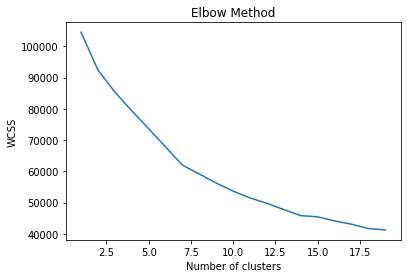

In [140]:
from sklearn.cluster import KMeans
#pour savoir le nb des clusters optimal
#à chaque k on s'intéresse à  inertie intra_classe 
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [141]:
kmeans = KMeans(n_clusters=2)
kmeans.fit_predict(X)#X_scaled


array([0, 0, 0, ..., 0, 0, 0])

In [142]:
pd.crosstab(targ,kmeans.labels_)

col_0,0,1
BAD,,
0,3775,861
1,965,206


# : Réduire la dimensionnalité des données 

In [143]:
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
print(X_principal.head()) 

              P1            P2
0  -78855.884493   5447.542197
1  -28624.873602  22466.472484
2 -104029.937730   8871.375784
3   22800.256644  18312.791411
4  -74938.997806   8190.730493


In [144]:
X_principal.shape


(5807, 2)

In [145]:
# X_principal
kmeans = KMeans(n_clusters=2)
k=kmeans.fit_predict(X_principal)
adjusted_rand_score(labels_true=targ,labels_pred=k)

-0.005587761685569277

In [146]:
pd.crosstab(targ,k)

col_0,0,1
BAD,,
0,3775,861
1,965,206


In [147]:
# X  scaled
kmeans = KMeans(n_clusters=2)
k1=kmeans.fit_predict(X_scaled)#X_scaled
adjusted_rand_score(labels_true=targ,labels_pred=k1)

0.013320273846291798

In [148]:
pd.crosstab(targ,k1)

col_0,0,1
BAD,,
0,3278,1358
1,782,389


 <span style="font-family: Arial; font-size:4.5em;color:red" >2) méthode hiéarchique CAH </span>



In [149]:
#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [150]:

z = linkage(X,method='ward',metric='euclidean')

 <span style="font-family: Arial; font-size:1.2em;color:red;"> l'affichage du dendogramme </span>
 Le dendrogramme « suggère» un découpage en 2 groupes

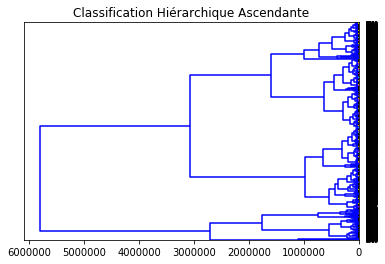

In [151]:
plt.title("Classification Hiérarchique Ascendante")
dendrogram(z,labels=dataSansNull["BAD"].index,orientation='left',color_threshold=17500)
plt.show()

In [152]:
#couper le dendogramme
clusters = fcluster(z,criterion='distance', t=3500000)

In [153]:
pd.crosstab(dataSansNull['BAD'],clusters)

col_0,1,2
BAD,,
0,656,3980
1,143,1028


In [154]:
adjusted_rand_score(dataSansNull.iloc[:,1],clusters)

0.0006140321878398476

In [155]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,33.925301,0,1,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,33.925301,0,1,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,33.925301,0,1,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,33.925301,0,1,0,1,0,0,0,0
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,0,1,0,0,1,0,0,0


 <span style="font-family: Arial; font-size:4.5em;color:red" >3) modéle denstié DBSCAN</span>



In [156]:
# X  
db_default = DBSCAN().fit(X) 
labels = db_default.labels_ 
adjusted_rand_score(labels_true=targ,labels_pred=labels)

0.0

In [157]:
pd.crosstab(y,db_default.fit_predict(X))

col_0,-1
BAD,
0,4636
1,1171


  <h1 align="center">  Pikel</h1>

In [689]:
 import pickle



In [690]:
algo=[
    [0.92,train_model],
     [0.87,dectree_basic]
]

In [691]:
#save model to disk
#ce qui prend deux arguments: l'objet que vous souhaitez décaper et le fichier dans lequel l'objet doit être enregistré.
pickle.dump(algo,open('modela.pkl','wb'))

In [692]:
model= pickle.load(open('modela.pkl','rb'))
 

In [693]:
#test
X.shape

(5807, 18)

In [694]:

y_pred_knn = knn_model.predict(X_test)

In [695]:
g=np.array([11000,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,33.779915,0.0,1.0,7.0,0.0,0.0,0.0,1.0,1.0])

In [696]:
g=pd.DataFrame((g.reshape(1,18)))


In [705]:
f=np.array([-0.85,  0.26,  0.04, -0.84, -0.33, -0.44, -1.56, -0.11, -1.81, -0.02,  0.66, -0.66, -0.38, -0.44, -0.92,  1.98, -0.14, -0.19])


In [706]:
k=  pd.DataFrame((f.reshape(1,18)))
k

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.85,0.26,0.04,-0.84,-0.33,-0.44,-1.56,-0.11,-1.81,-0.02,0.66,-0.66,-0.38,-0.44,-0.92,1.98,-0.14,-0.19


In [704]:
model[0][1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, seed=None,
              silent=1, subsample=0.5, verbosity=1)

### aq=X.iloc[4,]

In [721]:
k=np.array(k)

In [722]:
print(model[1][1].predict(k.reshape(1,18)))

[1]


In [723]:
train_model.predict(k.reshape(1,18))


array([1], dtype=int64)

In [588]:
 #mat= np.array([0,0,0,0,0,0])

In [589]:
#g=pd.DataFrame((mat.reshape(1,6)))

In [590]:
#dff=pd.concat([k,g],axis=1)

In [591]:
#dff.shape

## DASH

In [1]:
# Dash americain l'autre fichier